# Сборный проект №1

**Описание задачи:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выведем на экран информацию о датафрейме:**

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выведем на экран статистические характеристики числовых колонок методом describe()**

In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [4]:
games.columns = games.columns.str.lower() 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с дубликатами

In [5]:
games.duplicated().sum() #проверим датасет на наличие дубликатов

0

<div class="alert alert-block alert-info">
Строк-дубликатов в датафрейме не обнаружено

### Работа с пропусками

**Построим тепловую карту пропусков в данных:**

<AxesSubplot:>

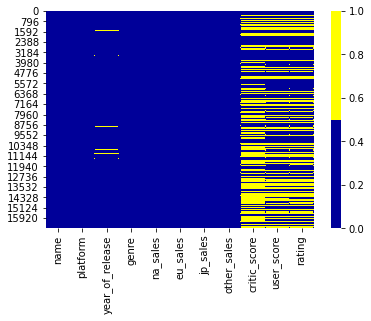

In [6]:
import seaborn as sns
cols = games.columns
colours = ['#000099', '#ffff00']
sns.heatmap(games[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
games.isna().sum() #посмотрим, в каких столбцах есть пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
pd.DataFrame(games.isna().sum()).style.background_gradient(axis = 0)

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


**Обнаружили пропуски в столбцах:** 
- 'name'
- 'year_of_release'
- 'genre'
- 'critic_score'
- 'user_score'
- 'rating'

#### Работа с пропусками в столбце 'name'

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
Пропуски в столбце могли возникнуть случайно. Так как их всего два и относятся к данным 1993 года, то данные строки можно удалить. В этих же строках находятся пропуски в столбце 'genre'.

In [10]:
games = games.dropna(subset=['name']) #удалим эти строки

#### Работа с пропусками в столбце 'year_of_release'

In [11]:
games[games['year_of_release'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
269 пропусков составляет 1.5% от датасета. Возможно, пропуски возникли из-за технического сбоя. Изначально была идея заполнить пропуски в столбце значением года выпуска по аналогичной платформе, но так как платформы существуют в течение нескольких лет, такие данные все равно будут недостоверными. Была идея заполнить пропуски нулями, но тогда при анализе выпуска игр по годам значение 0 сильно искажает график boxplot. В итоге приняла решение удалить строки. 


In [12]:
games = games.dropna(subset=['year_of_release'])

#### Работа с пропусками в столбце 'critic_score'

In [13]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
Пропусков в столбце critic_score очень много, примерно половина датасета. Возможно, пропуски возникли из-за того, что оценки критиков для данных игр отсутствуют в связи с непопулярностью игр или ранним годом выхода. Для того, чтобы не потерять данные и перевести в тип float32, заполним отсутствующие значения нулями.

In [14]:
games['critic_score'] = games['critic_score'].fillna(0)

#### Работа с пропусками в столбце 'user_score'

In [15]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN


<div class="alert alert-block alert-info">
По аналогии со столбцом critic_score заполним пропуски нулями. Возможно, пропуски возникли из-за того, что оценки пользователей для данных игр отсутствуют.

In [16]:
games['user_score'] = games['user_score'].fillna(0) 

<div class="alert alert-block alert-info">
В датасете помимо числовых значений оценок пользователей и пропусков присутствует еще аббревиатура tbd. tbd расшифровывается как "To Be Determined" - т.е., оценка будет определена позже. Скорее всего, она проставляется в тех случаях, когда количество собранных оценок недостаточно для того, чтобы корректно усреднить.  
По смыслу это ничем не отличается от пропуска.
Но удалять такие строки нельзя, можно ли оставить как есть, или же заменить строковое значение на "заглушку".

In [17]:
games[games['user_score']=='tbd'] #выведем на экран строки со значением tbd в столбце user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,0.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


<div class="alert alert-block alert-info">
tbd заменим маркерной заглушкой "-1", для того, чтобы не потерять данные и изменить тип данных с object на float32:**

In [18]:
games['user_score'] = games['user_score'].replace('tbd', -1)

In [19]:
games['user_score'].unique() #убедимся, что в датасете остались только численные значения

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', -1, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#### Работа с пропусками в столбце 'rating'

In [20]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,NaN


<div class="alert alert-block alert-info">
Возможно, пропуски возникли из-за того, что рейтинг по классификации ESRB для данных игр отсутствует в связи с ранним годом выхода игр или непопулярностью. Пропуски заполним маркерной заглушкой, чтобы не потерять большой объем данных:

In [21]:
games['rating'] = games['rating'].fillna(value='undef')

In [22]:
games.isna().sum() #убедимся в отсутствии пропусков после предобработки данных

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Изменение типов данных

In [23]:
games.info() # еще раз посмотрим на исходный датасет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-info">
Изменим тип данных в столбце 'year_of_release' на целочисленный int64, а  типы данных в столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score' на float32 для уменьшения размера файла данных.

In [24]:
list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']
for i in list:
    games[i] = games[i].astype('float32')

In [25]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [26]:
games.info() #посмотрим информацию после изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     16444 non-null  float32
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(6), int64(1), object(4)
memory usage: 1.1+ MB


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [27]:
games['year_of_release'].value_counts() #вызовем метод value_counts

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

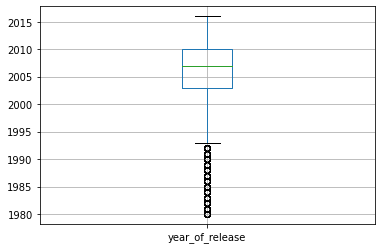

In [28]:
games.boxplot(column='year_of_release')
games['year_of_release'].describe()

<div class="alert alert-block alert-info">
На диаграмме видим, что выбросы находятся за пределами 1992 года, поэтому эти данные можно отбросить.

<AxesSubplot:>

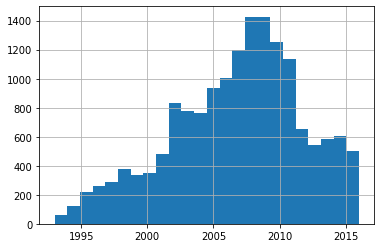

In [29]:
games = games[games.year_of_release > 1992] #отбросим данные за 1992 год и ранее
games['year_of_release'].hist(bins=24) #построим гистограмму количества выпуска игр по годам

<div class="alert alert-block alert-info">
Вывод: больше всего игр было выпущено в период с 2005 по 2011 год.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [30]:
#создадим столбец 'total_sales' для подсчета суммарных продаж
#games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
#games.head()

In [31]:
#создадим столбец 'total_sales' для подсчета суммарных продаж
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,0.0,0.0,undef,31.380001
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999


In [32]:
#сгруппируем платформы по количеству продаж и отсортируем по убыванию:
sales_per_platform = games.groupby('platform').agg(total_sales=('total_sales', 'sum'))\
.sort_values(by='total_sales', ascending=False)

sales_per_platform.head(10) # выберем платформы с наибольшими суммарными продажами


,total_sales
platform,
PS2,1233.559937
X360,961.239990
PS3,931.339966
Wii,891.179993
DS,802.760010
PS,727.580017
PS4,314.140015
GBA,312.880005
PSP,289.529999


<div class="alert alert-block alert-info">
Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS.

**Построим распределение по годам для выбранных платформ:**

In [33]:
top_platforms = games.query('platform in["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]\
& year_of_release >2005')
top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999
7,Wii Play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,28.910000
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E,28.319998
13,Wii Fit,Wii,2007,Sports,8.920000,8.030000,3.60,2.15,80.0,7.7,E,22.700001
14,Kinect Adventures!,X360,2010,Misc,15.000000,4.890000,0.24,1.69,61.0,6.3,E,21.820000
15,Wii Fit Plus,Wii,2009,Sports,9.010000,8.490000,2.53,1.77,80.0,7.4,E,21.800001
16,Grand Theft Auto V,PS3,2013,Action,7.020000,9.090000,0.98,3.96,97.0,8.2,M,21.049999


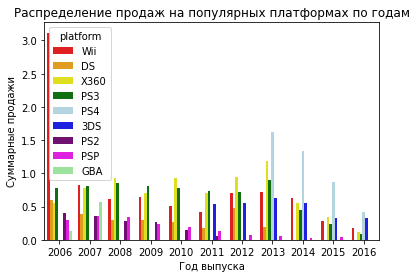

In [34]:
ax = sns.barplot(x='year_of_release',
                 y='total_sales',
                hue='platform',
                ci=None,
                data=top_platforms,
                palette=['red', 'orange', 'yellow', 'green', 'lightblue', 'blue', 'purple', 'magenta', 'lightgreen'])
ax.set_title('Распределение продаж на популярных платформах по годам')
ax.set(xlabel='Год выпуска', ylabel= 'Суммарные продажи')
sns.set(rc={'figure.figsize':(10,20)})

**За какой характерный срок появляются новые и исчезают старые платформы?**

<div class="alert alert-block alert-info"> 
Характерный срок возникновения-исчезновения равен примерно 10 годам. 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

<div class="alert alert-block alert-info">
Чтобы определить актуальный период, я решила посмотреть, какие платформы лидировали по количеству  продаж ближайшие несколько лет к 2017 году. 

In [35]:
games_2014_16 = games[games['year_of_release']>2013] #сделаем срез датасета 2014-2016 г
games_2014_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float32
 5   eu_sales         1689 non-null   float32
 6   jp_sales         1689 non-null   float32
 7   other_sales      1689 non-null   float32
 8   critic_score     1689 non-null   float32
 9   user_score       1689 non-null   float32
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float32
dtypes: float32(7), int64(1), object(4)
memory usage: 125.4+ KB


In [36]:
print(games_2014_16['platform'].unique()) #выведем на экран уникальные значения игровых платформ в 2014-2016

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP']


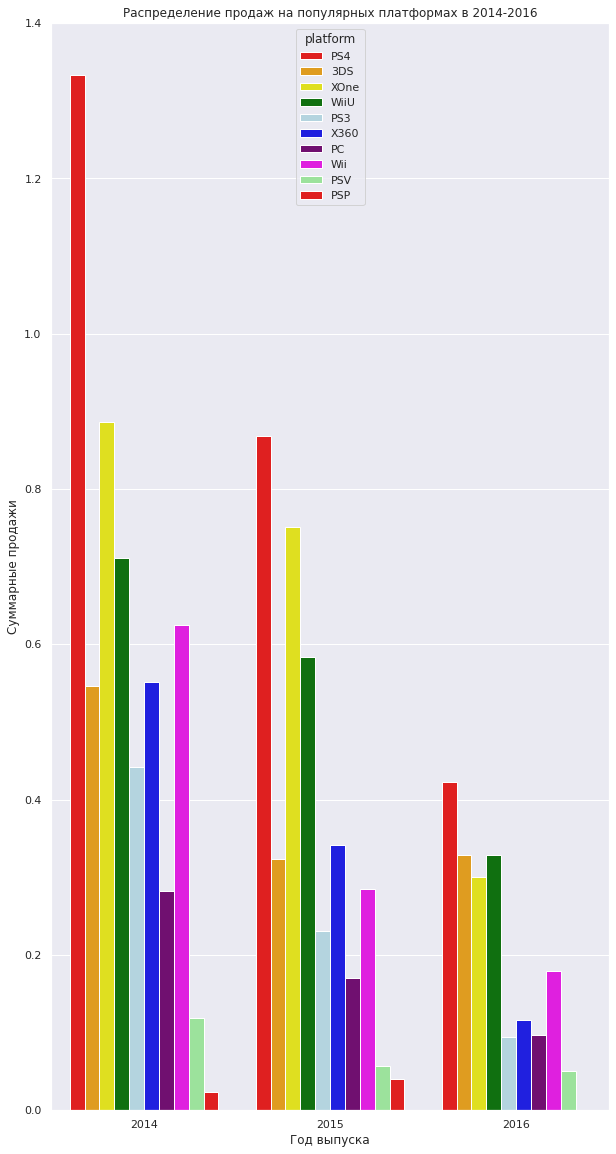

In [37]:
ax = sns.barplot(x='year_of_release',
                 y='total_sales',
                hue='platform',
                ci=None,
                data=games_2014_16,
                palette=['red', 'orange', 'yellow', 'green', 'lightblue', 'blue', 'purple', 'magenta', 'lightgreen'])
ax.set_title('Распределение продаж на популярных платформах в 2014-2016')
ax.set(xlabel='Год выпуска', ylabel= 'Суммарные продажи')
sns.set(rc={'figure.figsize':(5,5)})

<div class="alert alert-block alert-info">
Для прогноза на 2017 год будем анализировать данные за 2016. Несмотря на то, что суммарных продаж больше в 2014 и 2015 году, видим, что распределение платформ-лидеров неодинаково в 2014-2015 и 2016 годах. В 2016 наблюдаем 4 лидера примерно на одном уровне. Для анализа на следующий год нам важна актуальная картина, данные 2014 и 2015 годы можно считать уже устаревшими.

**Какие платформы лидируют по продажам, растут или падают?**

<div class="alert alert-block alert-info">
По продажам в 2014-2016 годах лидируют PS4, 3DS, XOne, WiiU. 
Про платформы PS3, X36, PC и Wii можно сказать, что они теряют популярность. 

**Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

<div class="alert alert-block alert-info">
В 2016 году лидируют 4 платформы: PS4, 3DS, XOne, WiiU, причем значения суммарных продаж для них достаточно близки.

<div class="alert alert-info"> 
<b> Нашла в seaborn метод sns.boxplot, чтобы построить групповой "ящик с усами", на нем нагляднее виден диапазон суммарных продаж по интересующим нас платформам. </b>

(0.0, 1.0)

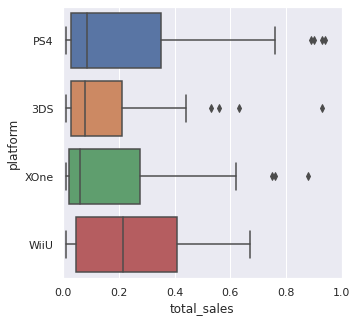

In [38]:
top_platforms_2016=games.query('year_of_release==2016 & platform in ["PS4", "3DS", "XOne", "WiiU"]')
sns.boxplot(y='platform', x='total_sales', data=top_platforms_2016, orient='h')
sns.set(rc={'figure.figsize':(5,5)})
plt.xlim(0,1)

<AxesSubplot:>

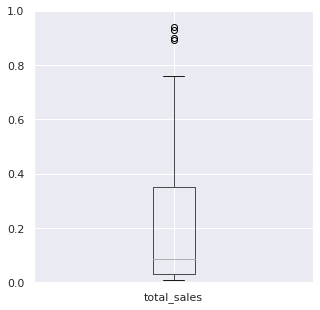

In [39]:
games_2016_PS4 = games.query('year_of_release==2016 & platform == "PS4"')
plt.ylim(0,1) #зададим границы графика, чтобы не мешали выбросы
games_2016_PS4.boxplot(column='total_sales')

<div class="alert alert-block alert-info">
Межквартильный размах показывает, что суммарные продажи игр на платформе PS4 за 2016 г. находятся в диапазоне от 0 до 0.35 млн копий.

<AxesSubplot:>

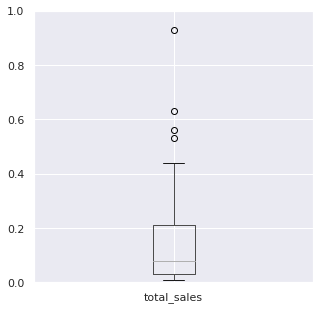

In [40]:
games_2016_3DS = games.query('year_of_release==2016 & platform == "3DS"')
plt.ylim(0,1) #зададим границы графика, чтобы не мешали выбросы
games_2016_3DS.boxplot(column='total_sales')

<div class="alert alert-block alert-info">
Межквартильный размах показывает, что суммарные продажи игр на платформе 3DS за 2016 г. находятся в диапазоне от 0 до 0.2 млн копий.

<AxesSubplot:>

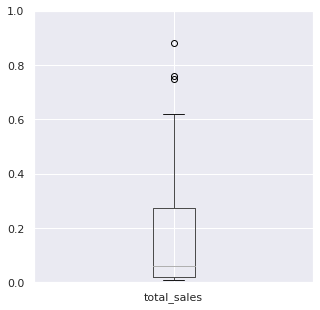

In [41]:
games_2016_XOne = games.query('year_of_release==2016 & platform == "XOne"')
plt.ylim(0,1) #зададим границы графика, чтобы не мешали выбросы
games_2016_XOne.boxplot(column='total_sales')

<div class="alert alert-block alert-info">
Межквартильный размах показывает, что суммарные продажи игр на платформе XOne за 2016 г. находятся в диапазоне от 0 до 0.3 млн копий.

<AxesSubplot:>

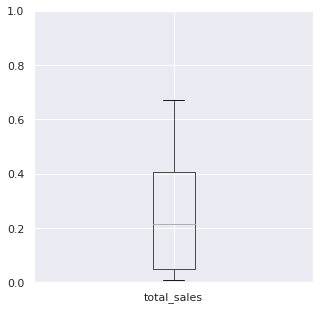

In [42]:
games_2016_WiiU = games.query('year_of_release==2016 & platform == "WiiU"')
plt.ylim(0,1) #зададим границы графика, чтобы не мешали выбросы
games_2016_WiiU.boxplot(column='total_sales')

<div class="alert alert-block alert-info">
Межквартильный размах показывает, что суммарные продажи игр на платформе WiiU за 2016 г. находятся в диапазоне от 0 до 0.4 млн копий.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

<div class="alert alert-block alert-info">
Проанализируем данные для отдельно для платформы XOne и для всех платформ

<div class="alert alert-info"> 
<b> Отфильтровала значения заглушек (0) в колонках critic_score и user_score  </b>

**Влияние отзывов критиков по популярной платформе XOne**

In [43]:
games_2016_xone = games.query('year_of_release==2016 & platform=="XOne" & critic_score!=0 & user_score!=0') #отфильтруем данные за 2016 год по платформе XOne

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


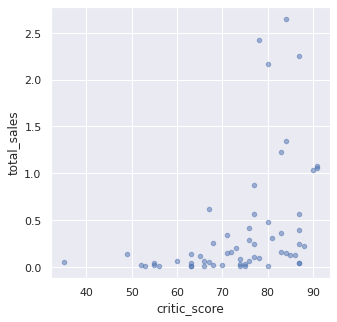

In [44]:
# построим диаграмму рассеяния зависимости общих продаж от отзывов критиков:
games_2016_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
sns.set(rc={'figure.figsize':(5,5)})

<div class="alert alert-block alert-info">
По диаграмме рассеяния можно сказать, что с повышением оценки критиков, есть тенденция увеличения продаж, однако значительной ее сложно назвать. Наблюдаем единичные выбросы после значени 60, а также скопление значений в 0, которым мы заполнили пропуски в данных. 

In [45]:
games_2016_xone['total_sales'].corr(games_2016_xone['critic_score']) #рассчитаем коэфф.корреляции Пирсона

0.4120052509700284

<div class="alert alert-block alert-info">
Вывод: Коэффициент корреляции 0.41, что говорит о прямой зависимости (чем выше, отзыв, тем лучше продажи), однако, не очень сильной.

**Влияние отзывов пользователей по платформе XOne**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

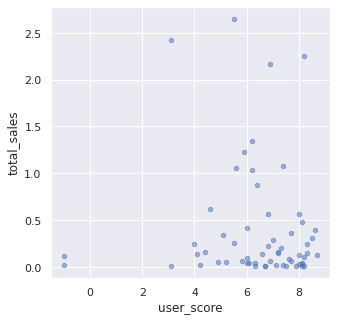

In [46]:
# построим диаграмму рассеяния зависимости общих продаж от отзывов критиков по платформе PS4:
games_2016_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5) 

<div class="alert alert-block alert-info">
По диаграмме рассеяния можно сказать, что распределение объема продаж от отзывов пользователей имеет хаотичный характер.

In [47]:
games_2016_xone['total_sales'].corr(games_2016_xone['user_score'])

-0.057550672291281586

<div class="alert alert-block alert-info">
Вывод: Коэффициент корреляции примерно равен 0, что говорит об отсутствии зависимости. Отзывы пользователей не влияют на продажи.

**Влияние отзывов критиков по всем платформам**

In [48]:
games_2016 = games.query('year_of_release==2016 & critic_score!=0 & user_score!=0') #сделаем срез данных по всем платформам за 2016 год

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

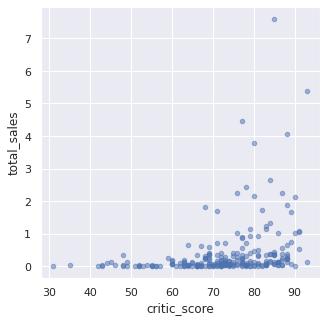

In [49]:
# построим диаграмму рассеяния зависимости общих продаж от отзывов критиков:
games_2016.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5) 

<AxesSubplot:xlabel='critic_score'>

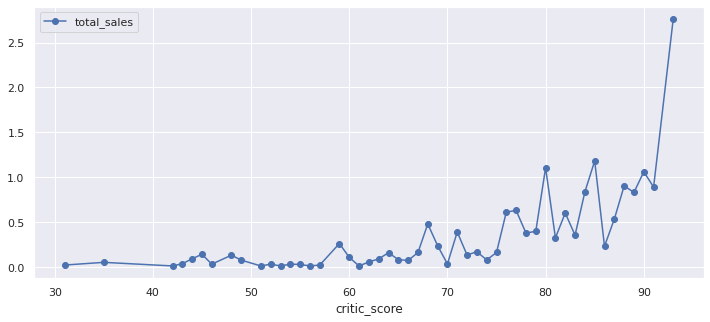

In [50]:
# для большей наглядности построим график зависимости общих продаж от отзывов критиков:
games_2016.pivot_table(
    index='critic_score', values='total_sales', aggfunc = 'mean').plot(grid=True, style ='o-', figsize=(12, 5))

In [51]:
games_2016['total_sales'].corr(games_2016['critic_score']) #вычислим коэффициент корреляции Пирсона

0.2975436204236732

<div class="alert alert-block alert-info">
Вывод: Коэффициент корреляции 0.29, что говорит о прямой зависимости (чем выше отзывы критиков, тем лучше продажи), однако довольно слабой.

**Влияние отзывов пользователей по всем платформам**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

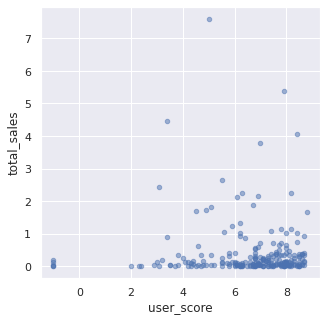

In [52]:
# построим диаграмму рассеяния зависимости общих продаж от отзывов пользователей:
games_2016.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5) 

In [53]:
games_2016['total_sales'].corr(games_2016['user_score']) #вычислим коэффициент корреляции Пирсона

-0.026943454133747703

<div class="alert alert-block alert-info">
Вывод: Коэффициент корреляции -0.03, что говорит об отсутствии зависимости.

<div class="alert alert-block alert-info">
Таким образом, делаем вывод, что отзывы критиков влияют на уровень продаж, а отзывы пользователей - нет.
Так, для отдельно взятой платформы XOne коэффициент корреляции отзывов критиков равен 0.41, а отзывов пользователей около 0. Для всех платформ коэффициент корреляции отзывов критиков равен 0.29, а отзывов пользователей также около 0.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

[Text(0.5, 0, 'Год выпуска'), Text(0, 0.5, 'Суммарные продажи')]

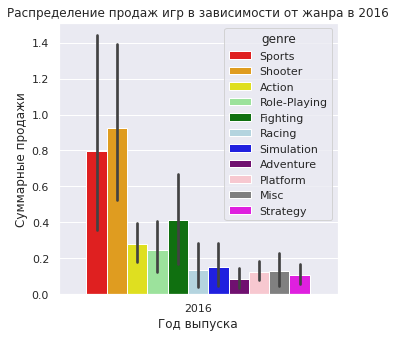

In [54]:
ax = sns.barplot(x='year_of_release',
                 y='total_sales',
                hue='genre',
                data=games_2016,
                palette=['red', 'orange', 'yellow', 'lightgreen','green', 'lightblue', 'blue', 'purple', 'pink', 'grey', 'magenta', 'brown'])
ax.set_title('Распределение продаж игр в зависимости от жанра в 2016')
ax.set(xlabel='Год выпуска', ylabel= 'Суммарные продажи')

<AxesSubplot:xlabel='genre', ylabel='platform'>

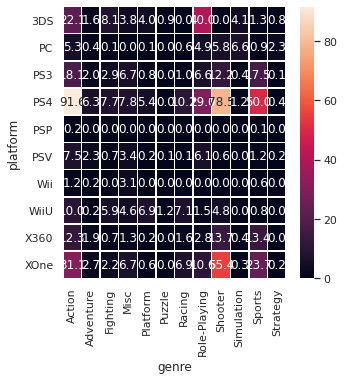

In [55]:
platform_genre_sales = games_2014_16.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

<div class="alert alert-block alert-info">
Вывод: самые продаваемые жанры - это Shooter, Sports, Role-playing, Fighting.

Жанры с низким уровнем продаж - Racing, Adventure, Misc, Simulation, Strategy, Puzzle

**Шаг 4. Определим самые популярные платформы (топ-5) для каждого региона:**

In [56]:
games_2016['platform'].unique() #посмотрим на уникальные значения в столбце platform и на предмет неявных дубликатов

array(['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'PSV'], dtype=object)

In [57]:
#сгруппируем платформы по количеству продаж за 2016 г. в Северной Америке и отсортируем по убыванию:
sales_na = games_2016.groupby('platform').agg(na_sales=('na_sales', 'sum'))\
.sort_values(by='na_sales', ascending=False)

sales_na.head() # выберем платформы с наибольшими суммарными продажами


,na_sales
platform,
PS4,18.299999
XOne,12.950000
WiiU,1.720000
PC,1.280000
3DS,0.690000


In [58]:
#sales_na = games_2016.groupby('platform').agg(na_sales=('na_sales', 'sum'))\
#.sort_values(by='na_sales', ascending=False).plot(kind='bar')

<div class="alert alert-block alert-info">
В Северной Америке лидируют PS4 и Xbox One, значительно меньше продажи игр на платформах 3DS, WiiU, PC		

In [59]:
#сгруппируем платформы по количеству продаж за 2016 г. в Европе и отсортируем по убыванию:
sales_eu = games_2016.groupby('platform').agg(eu_sales=('eu_sales', 'sum'))\
.sort_values(by='eu_sales', ascending=False)

sales_eu.head() # выберем платформы с наибольшими суммарными продажами

,eu_sales
platform,
PS4,27.700001
XOne,8.840000
PC,3.270000
WiiU,1.070000
3DS,0.420000


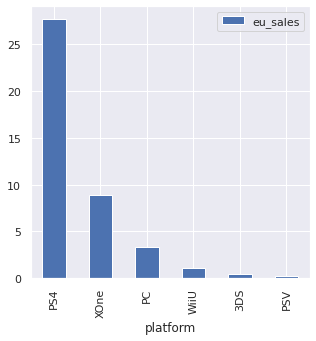

In [60]:
sales_eu = games_2016.groupby('platform').agg(eu_sales=('eu_sales', 'sum'))\
.sort_values(by='eu_sales', ascending=False).plot(kind='bar')

<div class="alert alert-block alert-info">
В Европе однозначным лидером по продаже игр является платформа PS4, в 3 раза меньше продаж на Xbox One.
На платформах 3DS, WiiU, PC	суммарно продаж игр меньшев 5 раз, чем на PS4	

In [61]:
#сгруппируем платформы по количеству продаж за 2016 г. в Японии и отсортируем по убыванию:
sales_jp = games_2016.groupby('platform').agg(jp_sales=('jp_sales', 'sum'))\
.sort_values(by='jp_sales', ascending=False)

sales_jp.head() # выберем платформы с наибольшими суммарными продажами

,jp_sales
platform,
PS4,2.56
3DS,0.96
PSV,0.49
WiiU,0.38
XOne,0.01


In [62]:
#sales_jp = games_2016.groupby('platform').agg(jp_sales=('jp_sales', 'sum'))\
#.sort_values(by='jp_sales', ascending=False).plot(kind='bar')

<div class="alert alert-block alert-info">
В Японии распределение продаж по платформам значительно отличается от Европы и Северной Америки. Здесь лидирует платформа 3DS, 2 и 3 место принадлежит PS4 и PSV соответственно.

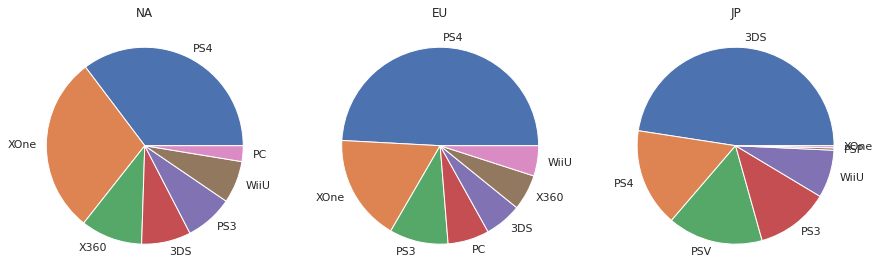

In [63]:
regions = games_2014_16.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(regions)):
  df_i = (games_2014_16.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False).
             head(7))
  axs[i].pie(df_i[regions[i]], labels = df_i['platform'])
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**Определим самые популярные жанры (топ-5) в каждом регионе:**

In [64]:
#сгруппируем жанры по количеству продаж за 2016 г. в Северной Америке и отсортируем по убыванию:
top_genres_na = games_2016.groupby('genre').agg(na_sales=('na_sales', 'sum'))\
.sort_values(by='na_sales', ascending=False)

top_genres_na.head() # выберем жанры с наибольшими суммарными продажами

,na_sales
genre,
Shooter,15.00
Action,7.19
Sports,6.87
Fighting,1.77
Role-Playing,1.77


<div class="alert alert-block alert-info">
В Северной Америке самым популярным жанром является shooter ("стрелялки"), далее по убыванию следуют экшен, спорт и ролевые игры.

In [65]:
#сгруппируем жанры по количеству продаж за 2016 г. в Европе и отсортируем по убыванию:
top_genres_eu = games_2016.groupby('genre').agg(eu_sales=('eu_sales', 'sum'))\
.sort_values(by='eu_sales', ascending=False)

top_genres_eu.head() # выберем жанры с наибольшими суммарными продажами

,eu_sales
genre,
Shooter,14.59
Sports,10.74
Action,8.77
Role-Playing,1.71
Fighting,1.30


<div class="alert alert-block alert-info">
В Европе выделяется тройка популярных жанров: "стрелялки", спорт и экшен. Ролевые игры и гонки на 4 и 5 месте.

In [66]:
#сгруппируем жанры по количеству продаж за 2016 г. в Японии и отсортируем по убыванию:
top_genres_jp = games_2016.groupby('genre').agg(jp_sales=('jp_sales', 'sum'))\
.sort_values(by='jp_sales', ascending=False)

top_genres_jp.head() # выберем жанры с наибольшими суммарными продажами

,jp_sales
genre,
Role-Playing,1.10
Shooter,1.04
Action,1.00
Fighting,0.57
Sports,0.30


<div class="alert alert-block alert-info">
В Японии общая картина самых популярных жанров отличается от Европы и Америки, здесь наиболее популярны 2 жанра: экшен и ролевые игры. На 3,4 и 5 местах примерно с одинаковой популярностью находятся приключения, стрелялки и смешанный тип (misc).

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [67]:
#сгруппируем данные по виду рейтинга и количеству продаж за 2016 г. в Северной Америке и отсортируем по убыванию:
top_rating_na = games_2016.groupby('rating').agg(na_sales=('na_sales', 'sum'))\
.sort_values(by='na_sales', ascending=False)

top_rating_na.head(6) # выберем жанры с наибольшими суммарными продажами

,na_sales
rating,
M,15.58
T,8.62
E,7.34
E10+,3.17
undef,0.34


<div class="alert alert-block alert-info">
В Северной Америке больше всего игр продано жанра М (Mature - только для взрослых), в 2 раза меньше продано игр для подростков (T - teens) и без возрастных ограничений (E- everyone).

In [68]:
#сгруппируем жанры по виду рейтинга и количеству продаж за 2016 г. в Европе и отсортируем по убыванию:
top_rating_eu = games_2016.groupby('rating').agg(eu_sales=('eu_sales', 'sum'))\
.sort_values(by='eu_sales', ascending=False)

top_rating_eu.head(6) # выберем жанры с наибольшими суммарными продажами

,eu_sales
rating,
M,16.48
E,12.57
T,9.26
E10+,2.87
undef,0.36


<div class="alert alert-block alert-info">
В Европе также больше всего игр продано жанра М (Mature - только для взрослых), чуть меньше без возрастных ограничений (E) и для подростков (T)

In [69]:
#сгруппируем жанры по виду рейтинга и количеству продаж за 2016 г. в Японии и отсортируем по убыванию:
top_rating_jp = games_2016.groupby('rating').agg(jp_sales=('jp_sales', 'sum'))\
.sort_values(by='jp_sales', ascending=False)

top_rating_jp.head(6) # выберем жанры с наибольшими суммарными продажами

,jp_sales
rating,
T,1.74
M,1.19
E,0.98
E10+,0.43
undef,0.06


<div class="alert alert-block alert-info">
В Японии больше всего игр продано в категории "для подростков", далее следуют игры для взрослых и без ограничений. На первом месте стоит категория "undef", значение, которым мы заполняли пропуски. 

## Проверка гипотез

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

H_0: Средний user_score платформы Xbox One = Средний user_score платформы PC

H_1: Средний user_score платформы Xbox One ≠ Средний user_score платформы PC

alpha = 0.05

In [70]:
from scipy import stats as st

In [71]:
x_one = games_2016.loc[games_2016['platform'] == 'XOne']['user_score']
pc = games_2016.loc[games_2016['platform'] == 'PC']['user_score']
results = st.ttest_ind(x_one, pc) #вызов метода для проверки гипотезы

alpha = 0.05 #задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.7722377838140815
Не получилось отвергнуть нулевую гипотезу


In [72]:
#для проверки себя вычислим среднее значение пользовательсокого рейтинга по платформам
print('Cреднее значение user_score на XOne:', games_2016.loc[games_2016['platform'] == 'XOne']['user_score'].mean())
print('Cреднее значение user_score на PC:', games_2016.loc[games_2016['platform'] == 'PC']['user_score'].mean())

Cреднее значение user_score на XOne: 6.405
Cреднее значение user_score на PC: 6.2977777


Средние значения пользовательского рейтинга 4.9 и 5.2 действительно различаются несильно.

<div class="alert alert-block alert-info">
Вывод: полученное значение p-value 59%, на основании чего можно сделать вывод, что в 2016 году пользовальский рейтинг игр на платформах Xbox One и PC одинаковый.

### Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

H_0: Средний user_score жанра Action = Средний user_score жанра Sports

H_1: Средний user_score жанра Action ≠ Средний user_score жанра Sports

alpha = 0.05

In [73]:
action = games_2016.loc[games_2016['genre'] == 'Action']['user_score']
sports = games_2016.loc[games_2016['genre'] == 'Sports']['user_score']
results = st.ttest_ind(action, sports) #вызов метода для проверки гипотезы

alpha = 0.05 #задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.08219230638924843
Не получилось отвергнуть нулевую гипотезу


In [74]:
#для проверки себя вычислим среднее значение пользовательсокого рейтинга для жанров экшен и спорт
print('Cреднее значение user_score для Action:', games_2016.loc[games_2016['genre'] == 'Action']['user_score'].mean())
print('Cреднее значение user_score для Sport:', games_2016.loc[games_2016['genre'] == 'Sports']['user_score'].mean())

Cреднее значение user_score для Action: 6.6724634
Cреднее значение user_score для Sport: 6.084615


Средние значения пользовательского рейтинга 3.1 и 4.1 различаются на единицу.

<div class="alert alert-block alert-info">
Вывод: полученное значение p-value 7.6%, на основании чего можно сделать вывод, что в 2016 году пользовальский рейтинг игр жанра экшен равен пользовальскому рейтингу жанра спорт.

<div class="alert alert-info"> 
<b> Так как нам требуется сравнить средние двух генеральных совокупностей (не зависимых друг от друга) между собой, то мы применяем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var), где array1 - это массив данных №1, array2 - массив данных №2. </b>


# Общий вывод:

**В ходе исследования был проанализирован датасет с данными по продажам игр в разные годы на разных платформах. Требовалось выявить определенные тенденции и зависимости, указанные ниже, для того, чтобы запустить успешную рекламную компанию на следующий год.**

**Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

<div class="alert alert-block alert-info">
Больше всего игр было выпущено в период с 2005 по 2011 год. Данные за все периоды не нужны, так как менялись игры и версии платформ. Для прогноза на 2017 год будем анализировать данные за 2016. Несмотря на то, что суммарных продаж больше в 2014 и 2015 году, видим, что распределение платформ-лидеров неодинаково в 2014-2015 и 2016 годах. В 2016 наблюдаем 4 лидера примерно на одном уровне. Для анализа на следующий год нам важна актуальная картина, данные 2014 и 2015 годы можно считать уже устаревшими.
</div>

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

<div class="alert alert-block alert-info">
Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS.
Характерный срок возникновения-исчезновения игровых платформ равен примерно 10 годам. 
</div>

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

<div class="alert alert-block alert-info">
В 2016 году лидируют 4 платформы: PS4, 3DS, XOne, WiiU, причем значения суммарных продаж для них достаточно близки.
Суммарные продажи игр  в 2016 г. на платформах:
- WiiU  в диапазоне от 0 до 0.4 млн копий;
- PS4 в диапазоне от 0 до 0.35 млн копий;
- XOne в диапазоне от 0 до 0.3 млн копий;
- 3DS в диапазоне от 0 до 0.2 млн копий;
</div>

**Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы**

<div class="alert alert-block alert-info">
Отзывы критиков влияют на уровень продаж, а отзывы пользователей - нет.
Так, для отдельно взятой платформы XOne коэффициент корреляции отзывов критиков равен 0.41, а отзывов пользователей 0. 
</div>

**Влияние отзывов пользователей и критиков на продажи игр на других платформах**

<div class="alert alert-block alert-info">
Отзывы критиков влияют на уровень продаж, а отзывы пользователей - нет.
Так, для всех платформ коэффициент корреляции отзывов критиков равен 0.29, а отзывов пользователей 0.
</div>

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**
<div class="alert alert-block alert-info">
Самые продаваемые жанры - это Shooter, Sports, Role-playing, Fighting.
Жанры с более низким уровнем продаж - Racing, Adventure, Misc, Simulation, Strategy, Puzzle
</div>


**Портрет пользователя каждого региона**
Определите для пользователя каждого региона (NA, EU, JP):
**Самые популярные платформы (топ-5). Различия в долях продаж.**
<div class="alert alert-block alert-info">
В Северной Америке лидируют по продажам игры на платформах PS4 и Xbox One, значительно меньше продажи игр на платформах 3DS, WiiU, PC.

В Европе однозначным лидером по продаже игр является платформа PS4, в 3 раза меньше продаж на Xbox One.
На платформах 3DS, WiiU, PC	суммарно продаж игр меньшев 5 раз, чем на PS4

В Японии распределение продаж по платформам значительно отличается от Европы и Северной Америки. Здесь лидирует платформа 3DS, 2 и 3 место принадлежит PS4 и PSV соответственно.
</div>

**Самые популярные жанры (топ-5). Поясните разницу**
<div class="alert alert-block alert-info">
В Северной Америке самым популярным жанром является shooter ("стрелялки"), далее по убыванию следуют экшен, спорт и ролевые игры.

В Европе выделяется тройка популярных жанров: "стрелялки", спорт и экшен. Ролевые игры и гонки на 4 и 5 месте.

В Японии общая картина самых популярных жанров отличается от Европы и Америки, здесь наиболее популярны 2 жанра: экшен и ролевые игры. На 3,4 и 5 местах примерно с одинаковой популярностью находятся приключения, стрелялки и смешанный тип (misc).
</div>

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**
<div class="alert alert-block alert-info">
В Северной Америке больше всего игр продано жанра М (Mature - только для взрослых), в 2 раза меньше продано игр для подростков (T - teens) и без возрастных ограничений (E- everyone).

В Европе также больше всего игр продано жанра М (Mature - только для взрослых), чуть меньше без возрастных ограничений (E) и для подростков (T).

В Японии больше всего игр продано в категории "для подростков", далее следуют игры для взрослых и без ограничений. На первом месте стоит категория "unknown", значение, которым мы заполняли пропуски.
</div>

**Проверка гипотез**
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые";
"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)" разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
<div class="alert alert-block alert-info">
Нулевую гипотезу формулировала со знаком =, альтернативную со знаком ≠. alpha задала 5%. Можно было и 1%, но смысла не имеет, так как полученные p-value равны 59 и 7.6, что больше 5.
Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). equal_var = True по умолчанию, т.к. предполагаем, что выборки очень похожи и их дисперсии равны.
</div>  

**Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

<div class="alert alert-block alert-info">
Вывод: полученное значение p-value 59%, на основании чего можно сделать вывод, что в 2016 году пользовальский рейтинг игр на платформах Xbox One и PC одинаковый.
</div> 

**Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

<div class="alert alert-block alert-info">
Вывод: полученное значение p-value 7.6%, на основании чего можно сделать вывод, что в 2016 году пользовальский рейтинг игр жанра экшен равен пользовальскому рейтингу жанра спорт.   
</div> 